In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models # add models to the list
import os
import time
from PIL import Image
from IPython.display import display
import numpy as np


In [2]:
#model_path = os.getenv("HOME") + '/Desktop/trainssd/' + 'best_model_resnet18.pth' 
model_path = os.getenv("HOME") + '/ros2_models/model_best.pth'
sd = torch.load(model_path)
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(512 ,6)
model.load_state_dict(sd['state_dict'])
model.eval().cuda()

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

with open(os.getenv("HOME") + '/ros2_models/classlabels.txt') as f:
    labels = [line.strip() for line in f.readlines()]

/home/khalid/.local/lib/python3.6/site-packages/torch/cuda/__init__.py:81: UserWarning: 
    Found GPU0 GeForce GTX 760 which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


tensor([[ 8.7060, -4.3667,  0.7329,  4.8188, -7.4505, -2.4703]],
       device='cuda:0', grad_fn=<AddmmBackward>)
bucket_blue 97.95620727539062


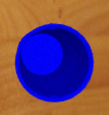

In [3]:
img = Image.open('/home/khalid/Downloads/temp/bucketblue.png')
#npimage = np.asarray(img)
#tensor_to_image = transforms.ToPILImage()
#img = tensor_to_image(npimage)
img_t = transform(img).cuda().unsqueeze_(0)
#batch_t = torch.unsqueeze(img_t, 0)

#with torch.no_grad():
prediction = model(img_t)
print(prediction)
_, index = torch.max(prediction, 1)

percentage = torch.nn.functional.softmax(prediction, dim=1)[0] * 100

print(labels[index], percentage[index[0]].item())
img

In [4]:
imageFolder = "/home/khalid/Downloads/wth" 
files = os.listdir(imageFolder)

for file in files:
    img = Image.open(os.path.join(imageFolder, file)).convert('RGB')
    npimage = np.asarray(img)
    npimage = np.asarray(img)
    tensor_to_image = transforms.ToPILImage()
    #img = tensor_to_image(npimage)
    img_t = transform(img).cuda()
    batch_t = torch.unsqueeze(img_t, 0)

    prediction = model(batch_t)
    _, index = torch.max(prediction, 1)
    print(index)
    percentage = torch.nn.functional.softmax(prediction, dim=1)[0] * 100
    print(labels[index[0]], percentage[index[0]].item(), file)

tensor([1], device='cuda:0')
bucket_green 50.31682205200195 ap_bucket_green3.png.png
tensor([2], device='cuda:0')
bucket_red 66.48929595947266 ap_bucket_red4.png
tensor([0], device='cuda:0')
bucket_blue 93.66895294189453 kabb4.png
tensor([0], device='cuda:0')
bucket_blue 76.84259033203125 kabc1.png
tensor([4], device='cuda:0')
cube_green 79.94660186767578 cube_green_5_lg.png
tensor([2], device='cuda:0')
bucket_red 57.81766891479492 karc3.png


(109, 115)


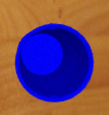